## **SETUP**

In [1]:
import tensorflow as tf 
from tensorflow import keras
from keras import optimizers
from keras.callbacks import ModelCheckpoint
from tensorflow.keras import regularizers
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.callbacks import EarlyStopping, ReduceLROnPlateau 

import random
import numpy as np
import seaborn as sns 
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

import os
import glob
import zipfile
import pathlib
from pathlib import Path


In [4]:
base_dir = '/content/images_train_test_val'

train =       os.path.join(base_dir, 'train')
validation =  os.path.join(base_dir, 'validation')
test =        os.path.join(base_dir, 'test')
val_dir = validation

In [5]:
print(train)
print(validation)
print(test)

/content/images_train_test_val/train
/content/images_train_test_val/validation
/content/images_train_test_val/test


In [ ]:
def number_dataset(name_data):
  number = pathlib.Path(name_data).glob('*/*')
  number = len(list(number))
  print(f"Number of {name_data.split('/')[-1]}set: {number}")

In [ ]:
number_dataset(train)

Number of trainset: 7350


In [ ]:
number_dataset(validation)

Number of validationset: 2100


In [ ]:
number_dataset(test)

Number of testset: 1050


In [ ]:
list_name_class = os.listdir(pathlib.Path(train))

### Explore data



Found 7350 files belonging to 21 classes.


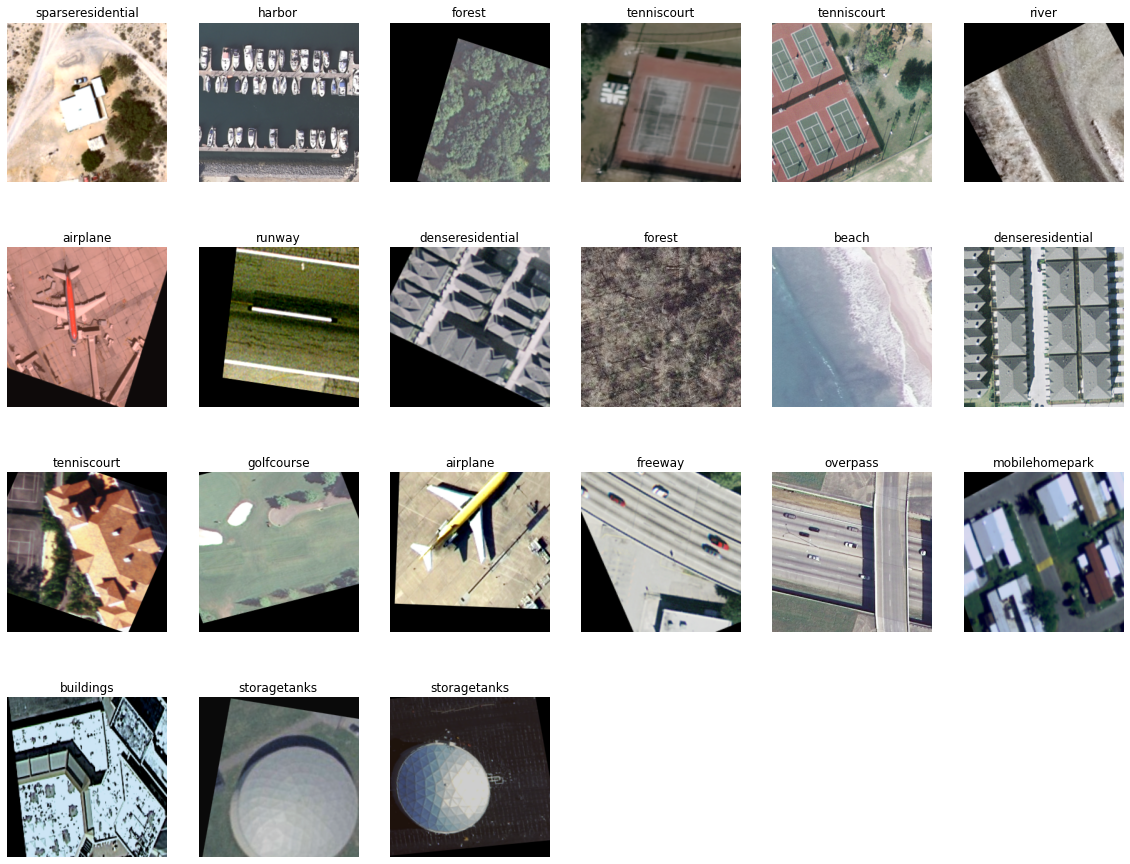

In [ ]:
image_size = (224, 224)
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(train)
class_names = train_dataset.class_names

plt.figure(figsize=(20, 20))
for images, labels in train_dataset.take(1):
  for i in range(21):
    ax = plt.subplot(5, 6, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

### Function loss graph

In [ ]:
def acc_loss_graph(history):
  #-----------------------------------------------------------
  # Retrieve a list of list results on training and test data
  # sets for each training epoch
  #-----------------------------------------------------------
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))
  #------------------------------------------------
  # Plot training and validation accuracy per epoch
  #------------------------------------------------
  plt.plot(epochs, acc, 'b', label='Training accuracy')
  plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
  plt.legend()
  plt.title('Training and validation accuracy')

  plt.figure()
  #------------------------------------------------
  # Plot training and validation loss per epoch
  #------------------------------------------------
  plt.plot(epochs, loss, 'b', label='Training Loss')
  plt.plot(epochs, val_loss, 'r', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

## **Build Model**

### Configure image Data Generator

In [ ]:

def generator_maker():

  train_datagen = ImageDataGenerator(rescale = 1./255, zoom_range = 0.2, horizontal_flip = True)
  val_test_datagen  = ImageDataGenerator(rescale=1./255)


  # train
  train_generator = train_datagen.flow_from_directory(train,
                                                target_size = (150,150),
                                                batch_size = 32,
                                                class_mode = 'categorical')

  # Validation
  val_generator = val_test_datagen.flow_from_directory(validation,
                                                  target_size = (150,150),
                                                  batch_size=32,
                                                  class_mode = 'categorical')

  # Test
  test_geneartor = val_test_datagen.flow_from_directory(test,
                                                    target_size = (150,150),
                                                    batch_size = 32,
                                                    class_mode = 'categorical')
  return train_generator, val_generator, test_geneartor

In [ ]:
train_generator, val_generator, test_geneartor = generator_maker()

Found 7350 images belonging to 21 classes.
Found 2100 images belonging to 21 classes.
Found 1050 images belonging to 21 classes.


In [ ]:
for batchs, labels in train_generator:
  print('Shape of batchs', batchs.shape)
  print('Shape of labels', batchs.shape)
  break

Shape of batchs (32, 150, 150, 3)
Shape of labels (32, 150, 150, 3)


### Start with simple model, only Dense

Fit with categorical 

In [ ]:
model_simple = keras.Sequential([
        layers.Flatten(input_shape=(150,150,3)),
        layers.Dense(512, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(21, activation='softmax')                  
])

In [ ]:
model_simple.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 67500)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               34560512  
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 21)                1365      
Total params: 34,734,357
Trainable params: 34,734,357
Non-trainable params: 0
____________________________________________

In [ ]:
model_simple.compile(optimizer='adam',
                     loss = 'categorical_crossentropy', # Why use categorical crossentropy instead of spares categorical crossentropy
                     metrics = ['accuracy'])

history_simple = model_simple.fit(train_generator,
                                  validation_data = val_generator,
                                  epochs = 10,
                                  verbose = 2)
                                  

Epoch 1/10
460/460 - 57s - loss: 3.0451 - accuracy: 0.0453 - val_loss: 3.0445 - val_accuracy: 0.0476
Epoch 2/10
460/460 - 57s - loss: 3.0450 - accuracy: 0.0414 - val_loss: 3.0445 - val_accuracy: 0.0476
Epoch 3/10
460/460 - 57s - loss: 3.0450 - accuracy: 0.0418 - val_loss: 3.0445 - val_accuracy: 0.0476
Epoch 4/10
460/460 - 57s - loss: 3.0450 - accuracy: 0.0412 - val_loss: 3.0445 - val_accuracy: 0.0476
Epoch 5/10
460/460 - 57s - loss: 3.0450 - accuracy: 0.0411 - val_loss: 3.0445 - val_accuracy: 0.0476
Epoch 6/10
460/460 - 57s - loss: 3.0450 - accuracy: 0.0412 - val_loss: 3.0445 - val_accuracy: 0.0476
Epoch 7/10
460/460 - 57s - loss: 3.0450 - accuracy: 0.0444 - val_loss: 3.0445 - val_accuracy: 0.0476
Epoch 8/10
460/460 - 57s - loss: 3.0450 - accuracy: 0.0419 - val_loss: 3.0445 - val_accuracy: 0.0476
Epoch 9/10
460/460 - 57s - loss: 3.0451 - accuracy: 0.0407 - val_loss: 3.0445 - val_accuracy: 0.0476
Epoch 10/10
460/460 - 57s - loss: 3.0450 - accuracy: 0.0431 - val_loss: 3.0445 - val_accura

Accuracy on sparse lower than categorical_crossentropy -> So we only use categorical cross entropy

### Go with CNN

With dropout, early stop, learning rate decay, regularizers

Define model

In [ ]:
def model_CNN_maker():
  model = tf.keras.models.Sequential([
      Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
      MaxPooling2D(2,2),
      Conv2D(64, (3,3), activation='relu'),
      MaxPooling2D(2,2),
      Conv2D(128, (3,3), activation='relu'),
      MaxPooling2D(2,2),
      Conv2D(128, (3,3), activation='relu'),
      MaxPooling2D(2,2),
      Flatten(),
      Dense(512, activation='relu'),
      Dense(21, activation='softmax')
  ])
  model.compile(optimizer='adam',
                loss='categorical_crossentropy',    
                metrics = ['accuracy'])
  return model

In [ ]:
model_CNN = model_CNN_maker()
model_CNN.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 15, 15, 128)     

Train

In [ ]:
history_CNN = model_CNN.fit(train_generator,
                            validation_data=val_generator,
                            epochs=10,
                            batch_size = 32,
                            verbose=1)

Epoch 1/10
230/230 [==============================] - 72s 313ms/step - loss: 2.3887 - accuracy: 0.2343 - val_loss: 2.0075 - val_accuracy: 0.3443
Epoch 2/10
230/230 [==============================] - 70s 304ms/step - loss: 1.7706 - accuracy: 0.4241 - val_loss: 1.7768 - val_accuracy: 0.4305
Epoch 3/10
230/230 [==============================] - 71s 309ms/step - loss: 1.3601 - accuracy: 0.5541 - val_loss: 1.3136 - val_accuracy: 0.5724
Epoch 4/10
230/230 [==============================] - 71s 309ms/step - loss: 1.0947 - accuracy: 0.6322 - val_loss: 1.2426 - val_accuracy: 0.5976
Epoch 5/10
230/230 [==============================] - 71s 310ms/step - loss: 0.9020 - accuracy: 0.6981 - val_loss: 1.0575 - val_accuracy: 0.6543
Epoch 6/10
230/230 [==============================] - 71s 309ms/step - loss: 0.7387 - accuracy: 0.7507 - val_loss: 1.0779 - val_accuracy: 0.6595
Epoch 7/10
230/230 [==============================] - 71s 308ms/step - loss: 0.6332 - accuracy: 0.7887 - val_loss: 0.9205 - val_ac

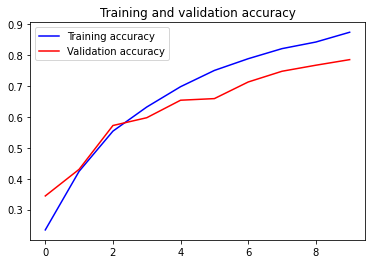

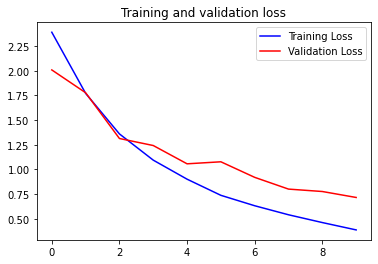

In [ ]:
acc_loss_graph(history_CNN)

Accroding to plot, we can see accuracy and loss on train and validation better than before. 

Our problem is overfit from epochs 5 and solution is early stopping and dropout.



In [ ]:
# Early stopping
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                        min_delta=1e-2,
                                                        patience=10,
                                                        verbose=1,
                                                        restore_best_weights = True)

In [ ]:
# Dropout
def model_CNN_dropout():
  model = tf.keras.models.Sequential([
      Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
      MaxPooling2D(2,2),
      layers.Dropout(0.2),
      Conv2D(64, (3,3), activation='relu'),
      MaxPooling2D(2,2),
      layers.Dropout(0.2),
      Conv2D(128, (3,3), activation='relu'),
      MaxPooling2D(2,2),
      layers.Dropout(0.2),
      Conv2D(128, (3,3), activation='relu'),
      MaxPooling2D(2,2),
      layers.Dropout(0.2),
      Flatten(),
      Dense(512, activation='relu'),
      Dense(21, activation='softmax')
  ])
  model.compile(optimizer='adam',
                loss='categorical_crossentropy',    
                metrics = ['accuracy'])
  return model

In [ ]:
model_CNN_drop_earlyStop = model_CNN_dropout()
model_CNN_drop_earlyStop.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_56 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_44 (Dropout)         (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_45 (Dropout)         (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 34, 34, 128)     

In [ ]:
history_CNN_drop_earlyStop = model_CNN_drop_earlyStop.fit(train_generator,
                                                          validation_data=val_generator,
                                                          epochs=10,
                                                          verbose=2,
                                                          batch_size = 32,
                                                          callbacks = [earlystop])

Epoch 1/10
230/230 - 70s - loss: 2.8404 - accuracy: 0.1099 - val_loss: 2.5948 - val_accuracy: 0.1819
Epoch 2/10
230/230 - 69s - loss: 2.1878 - accuracy: 0.2922 - val_loss: 2.0174 - val_accuracy: 0.3524
Epoch 3/10
230/230 - 69s - loss: 1.7534 - accuracy: 0.4306 - val_loss: 1.6458 - val_accuracy: 0.4443
Epoch 4/10
230/230 - 69s - loss: 1.4909 - accuracy: 0.5110 - val_loss: 1.3768 - val_accuracy: 0.5419
Epoch 5/10
230/230 - 69s - loss: 1.2222 - accuracy: 0.5910 - val_loss: 1.1537 - val_accuracy: 0.6219
Epoch 6/10
230/230 - 66s - loss: 1.0771 - accuracy: 0.6454 - val_loss: 1.1699 - val_accuracy: 0.6124
Epoch 7/10
230/230 - 67s - loss: 0.9381 - accuracy: 0.6865 - val_loss: 1.0389 - val_accuracy: 0.6605
Epoch 8/10
230/230 - 65s - loss: 0.8256 - accuracy: 0.7265 - val_loss: 0.9994 - val_accuracy: 0.6824
Epoch 9/10
230/230 - 66s - loss: 0.7160 - accuracy: 0.7577 - val_loss: 0.9683 - val_accuracy: 0.6886
Epoch 10/10
230/230 - 68s - loss: 0.6713 - accuracy: 0.7698 - val_loss: 0.8512 - val_accura

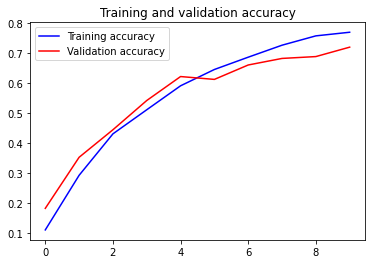

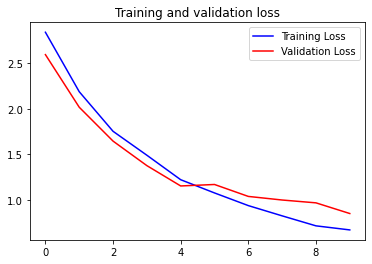

In [ ]:
acc_loss_graph(history_CNN_drop_earlyStop)

Try to use learning rate

In [ ]:
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.2, min_lr=0.001)

In [ ]:
# Fit again and add in learning rate
history_CNN_drop_earlyStop = model_CNN_drop_earlyStop.fit(train_generator,
                                                          validation_data=val_generator,
                                                          epochs=10,
                                                          batch_size=32,
                                                          verbose=1,
                                                          callbacks = [earlystop, reduce_lr])

Epoch 1/10
230/230 [==============================] - 73s 319ms/step - loss: 0.6041 - accuracy: 0.7966 - val_loss: 0.7578 - val_accuracy: 0.7567
Epoch 2/10
230/230 [==============================] - 73s 317ms/step - loss: 0.5274 - accuracy: 0.8219 - val_loss: 0.7652 - val_accuracy: 0.7567
Epoch 3/10
230/230 [==============================] - 73s 316ms/step - loss: 0.5249 - accuracy: 0.8235 - val_loss: 0.7014 - val_accuracy: 0.7743
Epoch 4/10
230/230 [==============================] - 72s 313ms/step - loss: 0.4426 - accuracy: 0.8498 - val_loss: 0.7144 - val_accuracy: 0.7710
Epoch 5/10
230/230 [==============================] - 73s 318ms/step - loss: 0.4356 - accuracy: 0.8505 - val_loss: 0.7179 - val_accuracy: 0.7843
Epoch 6/10
230/230 [==============================] - 71s 309ms/step - loss: 0.3962 - accuracy: 0.8629 - val_loss: 0.7266 - val_accuracy: 0.7810
Epoch 7/10
230/230 [==============================] - 71s 309ms/step - loss: 0.3883 - accuracy: 0.8649 - val_loss: 0.7107 - val_ac

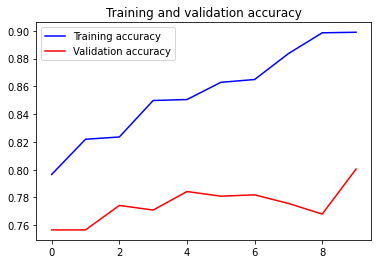

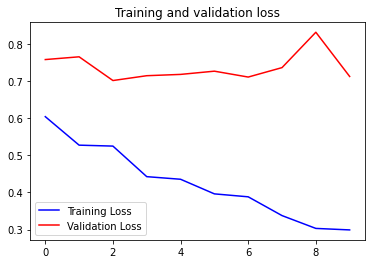

In [ ]:
acc_loss_graph(history_CNN_drop_earlyStop)

In [ ]:
# Dropout and regularizers
def model_CNN_master():
  model = tf.keras.models.Sequential([
      Conv2D(32, (3,3),kernel_regularizer=regularizers.l2(0.0001), activation='relu', input_shape=(150,150,3)),
      MaxPooling2D(2,2),
      layers.Dropout(0.2),
      Conv2D(64, (3,3),kernel_regularizer=regularizers.l2(0.0001), activation='relu'),
      MaxPooling2D(2,2),
      layers.Dropout(0.2),
      Conv2D(128, (3,3),kernel_regularizer=regularizers.l2(0.0001), activation='relu'),
      MaxPooling2D(2,2),
      layers.Dropout(0.2),
      Conv2D(128, (3,3),kernel_regularizer=regularizers.l2(0.0001), activation='relu'),
      MaxPooling2D(2,2),
      layers.Dropout(0.2),
      Flatten(),
      Dense(512, activation='relu'),
      Dense(21, activation='softmax')
  ])
  model.compile(optimizer='adam',
                loss='categorical_crossentropy',    
                metrics = ['accuracy'])
  return model

In [ ]:
model_master = model_CNN_master()
model_master.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_60 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_48 (Dropout)         (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_49 (Dropout)         (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 34, 34, 128)     

In [ ]:
history_model_master = model_master.fit(train_generator,
                                      validation_data=val_generator,
                                        epochs=20,
                                        batch_size=32,
                                        verbose=1,
                                        callbacks = [earlystop,reduce_lr])

Epoch 1/20
230/230 [==============================] - 74s 317ms/step - loss: 2.8570 - accuracy: 0.1192 - val_loss: 2.6165 - val_accuracy: 0.1995
Epoch 2/20
230/230 [==============================] - 71s 310ms/step - loss: 2.1156 - accuracy: 0.3316 - val_loss: 1.8097 - val_accuracy: 0.4219
Epoch 3/20
230/230 [==============================] - 70s 304ms/step - loss: 1.6598 - accuracy: 0.4650 - val_loss: 1.4667 - val_accuracy: 0.5086
Epoch 4/20
230/230 [==============================] - 71s 308ms/step - loss: 1.4240 - accuracy: 0.5424 - val_loss: 1.4311 - val_accuracy: 0.5324
Epoch 5/20
230/230 [==============================] - 72s 313ms/step - loss: 1.2128 - accuracy: 0.6045 - val_loss: 1.3039 - val_accuracy: 0.5886
Epoch 6/20
230/230 [==============================] - 71s 307ms/step - loss: 1.0932 - accuracy: 0.6468 - val_loss: 1.1364 - val_accuracy: 0.6414
Epoch 7/20
230/230 [==============================] - 71s 308ms/step - loss: 0.9593 - accuracy: 0.6848 - val_loss: 1.0038 - val_ac

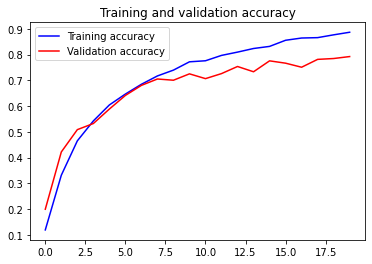

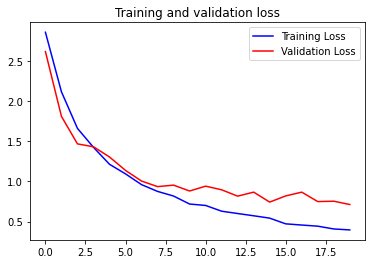

In [ ]:
acc_loss_graph(history_model_master)

### VGG16

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
model_vgg16 = VGG16(weights='imagenet', 
                    include_top=False, 
                    #classes=21, 
                    #classifier_activation='softmax', 
                    input_shape=[224,224,3])

58900480/58889256 [==============================] - 0s 0us/step


In Keras, each layer has a parameter called “trainable”. For freezing the weights of a particular layer, we should set this parameter to False, indicating that this layer should not be trained. That’s it! We go over each layer and select which layers we want to train.

In [ ]:
for layer in model_vgg16.layers[:]:
  layer.trainable = False

In [ ]:
for layer in model_vgg16.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7fe3ccc29150> False
<keras.layers.convolutional.Conv2D object at 0x7fe3cbba1890> False
<keras.layers.convolutional.Conv2D object at 0x7fe3cb27b1d0> False
<keras.layers.pooling.MaxPooling2D object at 0x7fe3c070d390> False
<keras.layers.convolutional.Conv2D object at 0x7fe3c0710b90> False
<keras.layers.convolutional.Conv2D object at 0x7fe3c0718190> False
<keras.layers.pooling.MaxPooling2D object at 0x7fe3c0710f10> False
<keras.layers.convolutional.Conv2D object at 0x7fe3c0721410> False
<keras.layers.convolutional.Conv2D object at 0x7fe416edd910> False
<keras.layers.convolutional.Conv2D object at 0x7fe3c072ebd0> False
<keras.layers.pooling.MaxPooling2D object at 0x7fe3c0721990> False
<keras.layers.convolutional.Conv2D object at 0x7fe3c06b3bd0> False
<keras.layers.convolutional.Conv2D object at 0x7fe3c06ba290> False
<keras.layers.convolutional.Conv2D object at 0x7fe3c06b39d0> False
<keras.layers.pooling.MaxPooling2D object at 0x7fe3c06c4d50>

In [ ]:
# Create the model
model_vgg16_import = keras.Sequential()

# Add the vgg16 convolutional base model
model_vgg16_import.add(model_vgg16)

# Add new layers
model_vgg16_import.add(Flatten())

model_vgg16_import.add(Dense(1024, activation='relu'))

model_vgg16_import.add(layers.Dropout(0.2))

model_vgg16_import.add(Dense(21, activation='softmax'))

# Show a summary of the model. Check the number of trainable parameters

model_vgg16_import.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 21)                21525     
Total params: 40,427,349
Trainable params: 25,712,661
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
def generator_maker_vgg16():

  train_datagen = ImageDataGenerator(rescale = 1./255, zoom_range = 0.2, horizontal_flip = True)
  val_test_datagen  = ImageDataGenerator(rescale=1./255)


  # train
  train_generator_vgg16 = train_datagen.flow_from_directory(train,
                                                target_size = (224,224),
                                                batch_size = 32,
                                                class_mode = 'categorical')

  # Validation
  val_generator_vgg16 = val_test_datagen.flow_from_directory(validation,
                                                  target_size = (224,224),
                                                  batch_size=32,
                                                  shuffle = False,
                                                  class_mode = 'categorical')

  # Test
  test_geneartor_vgg16 = val_test_datagen.flow_from_directory(test,
                                                    target_size = (224,224),
                                                    batch_size = 32,
                                                    class_mode = 'categorical')
  
  return train_generator_vgg16, val_generator_vgg16, test_geneartor_vgg16

In [ ]:
train_generator_vgg16, val_generator_vgg16, test_geneartor_vgg16 = generator_maker_vgg16()

Found 7350 images belonging to 21 classes.
Found 2100 images belonging to 21 classes.
Found 1050 images belonging to 21 classes.


In [ ]:
for batchs,label in val_generator_vgg16:
  print(label)
  break

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0.

In [ ]:
base_dir = './images_train_test_val'

train =       os.path.join(base_dir, 'train')

train_list_test = os.listdir(train)

In [ ]:
print(train_list_test)

['intersection', 'overpass', 'denseresidential', 'chaparral', 'parkinglot', 'storagetanks', 'airplane', 'freeway', 'agricultural', 'buildings', 'tenniscourt', 'river', 'forest', 'golfcourse', 'harbor', 'runway', 'baseballdiamond', 'beach', 'sparseresidential', 'mobilehomepark', 'mediumresidential']


In [ ]:
train_list_test[6]

'airplane'

Fine tune with SGD and learning rate decay

In [ ]:
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                                              patience=5, 
                                              factor=0.2, 
                                              min_lr=0.001)

sgd = tf.keras.optimizers.SGD(learning_rate = 0.001, momentum=0.9)

In [ ]:
model_vgg16_import.compile(optimizer=sgd,
                    loss = 'categorical_crossentropy',
                    metrics = ['accuracy'])

In [ ]:
history_model_vgg16_import = model_vgg16_import.fit(train_generator_vgg16,
                          validation_data=val_generator_vgg16,
                          steps_per_epoch = (train_generator_vgg16.samples/ train_generator_vgg16.batch_size),
                          epochs=20,
                          verbose=1,
                          callbacks = [earlystop,reduce_lr])

Epoch 1/20
229/229 [==============================] - 132s 571ms/step - loss: 2.7159 - accuracy: 0.1083 - val_loss: 2.6135 - val_accuracy: 0.1271
Epoch 2/20
229/229 [==============================] - 129s 561ms/step - loss: 2.7117 - accuracy: 0.1146 - val_loss: 2.6088 - val_accuracy: 0.1471
Epoch 3/20
229/229 [==============================] - 129s 561ms/step - loss: 2.7051 - accuracy: 0.1128 - val_loss: 2.6034 - val_accuracy: 0.1481
Epoch 4/20
229/229 [==============================] - 133s 579ms/step - loss: 2.7046 - accuracy: 0.1116 - val_loss: 2.5990 - val_accuracy: 0.1362
Epoch 5/20
229/229 [==============================] - 129s 562ms/step - loss: 2.6981 - accuracy: 0.1097 - val_loss: 2.5967 - val_accuracy: 0.1371
Epoch 6/20
229/229 [==============================] - 136s 590ms/step - loss: 2.6957 - accuracy: 0.1113 - val_loss: 2.5913 - val_accuracy: 0.1467
Epoch 7/20
229/229 [==============================] - 131s 570ms/step - loss: 2.6929 - accuracy: 0.1140 - val_loss: 2.5909 -

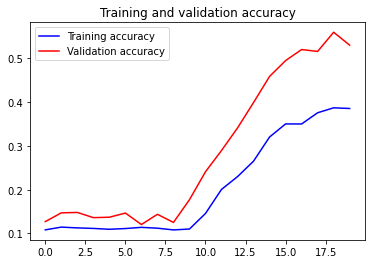

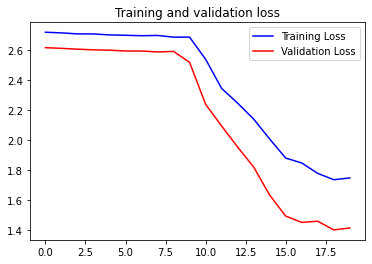

In [ ]:
acc_loss_graph(history_model_vgg16_import)

In [ ]:
history_model_vgg16_import = model_vgg16_import.fit(train_generator_vgg16,
                          validation_data=val_generator_vgg16,
                          steps_per_epoch = (train_generator_vgg16.samples/ train_generator_vgg16.batch_size),
                          epochs=20,
                          verbose=1,
                          callbacks = [earlystop,reduce_lr])

Epoch 1/20
229/229 [==============================] - 131s 572ms/step - loss: 1.7163 - accuracy: 0.3914 - val_loss: 1.3508 - val_accuracy: 0.5629
Epoch 2/20
229/229 [==============================] - 129s 561ms/step - loss: 1.6787 - accuracy: 0.4147 - val_loss: 1.3073 - val_accuracy: 0.5757
Epoch 3/20
229/229 [==============================] - 130s 565ms/step - loss: 1.6649 - accuracy: 0.4082 - val_loss: 1.2558 - val_accuracy: 0.6062
Epoch 4/20
229/229 [==============================] - 131s 570ms/step - loss: 1.6550 - accuracy: 0.4204 - val_loss: 1.2467 - val_accuracy: 0.6029
Epoch 5/20
229/229 [==============================] - 133s 577ms/step - loss: 1.6382 - accuracy: 0.4259 - val_loss: 1.2055 - val_accuracy: 0.6162
Epoch 6/20
229/229 [==============================] - 132s 576ms/step - loss: 1.6212 - accuracy: 0.4354 - val_loss: 1.1705 - val_accuracy: 0.6167
Epoch 7/20
229/229 [==============================] - 131s 568ms/step - loss: 1.6039 - accuracy: 0.4340 - val_loss: 1.1525 -

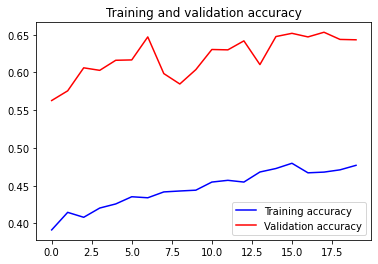

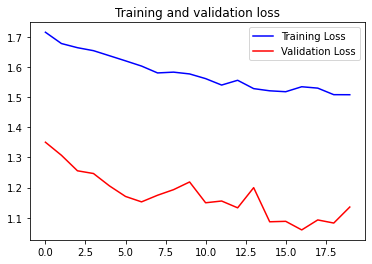

In [ ]:
acc_loss_graph(history_model_vgg16_import)

Use optimizer Adam

In [ ]:
model_vgg16_import.compile(optimizer='adam',
                    loss = 'categorical_crossentropy',
                    metrics = ['accuracy'])

In [ ]:
history_model_vgg16_import = model_vgg16_import.fit(train_generator_vgg16,
                          validation_data=val_generator_vgg16,
                          steps_per_epoch = (train_generator_vgg16.samples/ train_generator_vgg16.batch_size),
                          epochs=10,
                          verbose=1,
                          callbacks = [earlystop,reduce_lr])

Epoch 1/10
229/229 [==============================] - 139s 512ms/step - loss: 1.4764 - accuracy: 0.6259 - val_loss: 0.6034 - val_accuracy: 0.7990
Epoch 2/10
229/229 [==============================] - 109s 475ms/step - loss: 0.5782 - accuracy: 0.8035 - val_loss: 0.4645 - val_accuracy: 0.8486
Epoch 3/10
229/229 [==============================] - 109s 473ms/step - loss: 0.4634 - accuracy: 0.8365 - val_loss: 0.5152 - val_accuracy: 0.8248
Epoch 4/10
229/229 [==============================] - 108s 471ms/step - loss: 0.3978 - accuracy: 0.8634 - val_loss: 0.4572 - val_accuracy: 0.8533
Epoch 5/10
229/229 [==============================] - 109s 473ms/step - loss: 0.3366 - accuracy: 0.8852 - val_loss: 0.3870 - val_accuracy: 0.8748
Epoch 6/10
229/229 [==============================] - 108s 471ms/step - loss: 0.2877 - accuracy: 0.8992 - val_loss: 0.3437 - val_accuracy: 0.8819
Epoch 7/10
229/229 [==============================] - 108s 471ms/step - loss: 0.2663 - accuracy: 0.9094 - val_loss: 0.3714 -

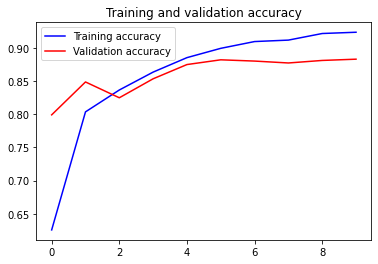

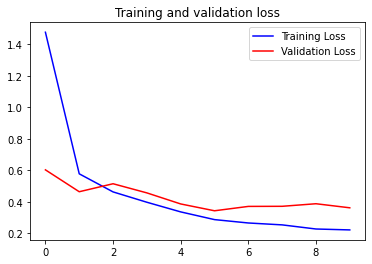

In [ ]:
acc_loss_graph(history_model_vgg16_import)

In this case, epoch equal 6 is the best option.

Because the loss on train and validation set are same values (0.3366 and 0.387)
and both accuracy equal 88 %

Restart with 5 epochs

In [ ]:
model_vgg16_import.compile(optimizer='adam',
                          loss = 'categorical_crossentropy',
                          metrics = ['accuracy'])

In [ ]:
history_model_vgg16_import = model_vgg16_import.fit(train_generator_vgg16,
                                                    validation_data=val_generator_vgg16,
                                                    steps_per_epoch = (train_generator_vgg16.samples/ train_generator_vgg16.batch_size),
                                                    epochs=5,
                                                    verbose=1,
                                                    callbacks = [earlystop,reduce_lr])

Epoch 1/5
229/229 [==============================] - 110s 477ms/step - loss: 1.3907 - accuracy: 0.6380 - val_loss: 0.5975 - val_accuracy: 0.8048
Epoch 2/5
229/229 [==============================] - 109s 475ms/step - loss: 0.5905 - accuracy: 0.8056 - val_loss: 0.4730 - val_accuracy: 0.8405
Epoch 3/5
229/229 [==============================] - 109s 475ms/step - loss: 0.4614 - accuracy: 0.8351 - val_loss: 0.4339 - val_accuracy: 0.8486
Epoch 4/5
229/229 [==============================] - 109s 473ms/step - loss: 0.3804 - accuracy: 0.8686 - val_loss: 0.3834 - val_accuracy: 0.8662
Epoch 5/5
229/229 [==============================] - 108s 472ms/step - loss: 0.3210 - accuracy: 0.8891 - val_loss: 0.4056 - val_accuracy: 0.8686


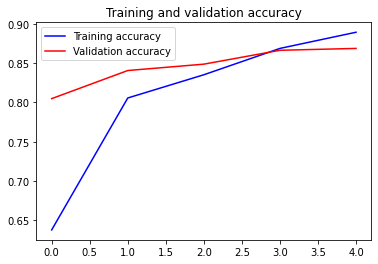

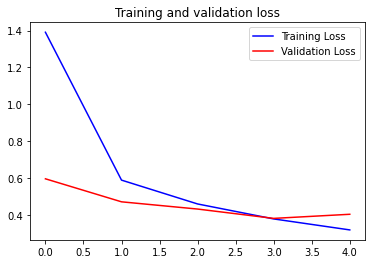

In [ ]:
acc_loss_graph(history_model_vgg16_import)

In [ ]:
loss, acc = model_vgg16_import.evaluate(test_geneartor_vgg16)

33/33 [==============================] - 10s 315ms/step - loss: 0.4718 - accuracy: 0.8629


### Transfer learning with Xception

Prepare image data generator

In [ ]:
def generator_maker_Xception():

  train_datagen = ImageDataGenerator(zoom_range = 0.2, horizontal_flip = True)
  val_test_datagen  = ImageDataGenerator()


  # train
  train_generator_xception = train_datagen.flow_from_directory(train,
                                                target_size = (299,299),
                                                batch_size = 32,
                                                class_mode = 'categorical')

  # Validation
  val_generator_xception = val_test_datagen.flow_from_directory(validation,
                                                  target_size = (299,299),
                                                  batch_size=32,
                                                  shuffle = False,
                                                  class_mode = 'categorical')

  # Test
  test_geneartor_xception = val_test_datagen.flow_from_directory(test,
                                                    target_size = (299,299),
                                                    batch_size = 32,
                                                    class_mode = 'categorical')
  
  return train_generator_xception, val_generator_xception, test_geneartor_xception

In [ ]:
train_generator_xception, val_generator_xception, test_geneartor_xception = generator_maker_Xception()

Found 7350 images belonging to 21 classes.
Found 2100 images belonging to 21 classes.
Found 1050 images belonging to 21 classes.


Build Xception

In [ ]:
xception_model = keras.applications.Xception(weights='imagenet',
                                             input_shape = (299,299,3),
                                             include_top = False)
xception_model.trainable = False

83697664/83683744 [==============================] - 2s 0us/step


The default input image size for Xception is 299x299 and scale input pixels between -1 and 1

In [ ]:
def xception_maker():
  inputs = keras.Input(shape=(299,299,3))
  x = tf.keras.applications.xception.preprocess_input(inputs)
  x = xception_model(x, training=False)
  x = layers.GlobalAveragePooling2D()(x)
  x = layers.Dropout(0.2)(x)
  outputs = layers.Dense(21, activation='softmax')(x)
  modelX = keras.Model(inputs, outputs)

  return modelX

In [ ]:
modelX = xception_maker()
modelX.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 299, 299, 3)]     0         
_________________________________________________________________
tf.math.truediv (TFOpLambda) (None, 299, 299, 3)       0         
_________________________________________________________________
tf.math.subtract (TFOpLambda (None, 299, 299, 3)       0         
_________________________________________________________________
xception (Functional)        (None, 10, 10, 2048)      20861480  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 21)                43029 

In [ ]:
modelX.compile(optimizer='adam',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

New early stop, learning rate decay

In [ ]:
callback = [EarlyStopping(monitor = 'val_loss', 
                          patience=5, 
                          restore_best_weights=True),

            ReduceLROnPlateau(monitor = 'val_loss',
                              patience = 5,
                              factor = 0.2,
                              min_lr = 1e-2)]

init_epochs = 40

history_xception = modelX.fit(train_generator_xception,
                              validation_data = val_generator_xception,
                              epochs = init_epochs,
                              callbacks = callback)

Epoch 1/40
230/230 [==============================] - 244s 1s/step - loss: 1.2586 - accuracy: 0.7239 - val_loss: 0.5945 - val_accuracy: 0.8843
Epoch 2/40
230/230 [==============================] - 240s 1s/step - loss: 0.5300 - accuracy: 0.8793 - val_loss: 0.4047 - val_accuracy: 0.9052
Epoch 3/40
230/230 [==============================] - 238s 1s/step - loss: 0.3896 - accuracy: 0.9024 - val_loss: 0.3211 - val_accuracy: 0.9200
Epoch 4/40
230/230 [==============================] - 237s 1s/step - loss: 0.3282 - accuracy: 0.9184 - val_loss: 0.2812 - val_accuracy: 0.9300
Epoch 5/40
230/230 [==============================] - 237s 1s/step - loss: 0.2816 - accuracy: 0.9283 - val_loss: 0.2465 - val_accuracy: 0.9348
Epoch 6/40
230/230 [==============================] - 237s 1s/step - loss: 0.2529 - accuracy: 0.9367 - val_loss: 0.2296 - val_accuracy: 0.9381
Epoch 7/40
230/230 [==============================] - 237s 1s/step - loss: 0.2285 - accuracy: 0.9427 - val_loss: 0.2123 - val_accuracy: 0.9414

In [ ]:
acc = history_xception.history['accuracy']
val_acc = history_xception.history['val_accuracy']

loss = history_xception.history['loss']
val_loss = history_xception.history['val_loss']

#### Fine tune

In [ ]:
print("Number of layers in the Xception model:", len(xception_model.layers))

Number of layers in the Xception model: 132


In [ ]:
# Unfreeze Xeception model
xception_model.trainable = True

# Fine-tune from this layer onward
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in xception_model.layers[:fine_tune_at]:
  layer.trainable =  False

modelX.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

modelX.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 299, 299, 3)]     0         
_________________________________________________________________
tf.math.truediv (TFOpLambda) (None, 299, 299, 3)       0         
_________________________________________________________________
tf.math.subtract (TFOpLambda (None, 299, 299, 3)       0         
_________________________________________________________________
xception (Functional)        (None, 10, 10, 2048)      20861480  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 21)                43029 

In [ ]:
checkpoint_filepath = 'Model_Xception_{epoch}.h5'

callbacks = [EarlyStopping(monitor='val_loss', 
                           patience=3, 
                           restore_best_weights=True, 
                           verbose=1),
             
             ModelCheckpoint(monitor='val_loss', 
                             filepath = checkpoint_filepath, 
                             save_weights_only=False, 
                             save_best_only=True, 
                             verbose=1),
             
             ReduceLROnPlateau(monitor = 'val_loss',
                              patience = 3,
                              factor = 0.2,
                              min_lr = 1e-2)]

init_epochs = 40
fine_tune_epochs = 40
total_epochs = init_epochs + fine_tune_epochs

history_xception_fine = modelX.fit(train_generator_xception, 
                         validation_data=val_generator_xception,
                         epochs=total_epochs,
                         initial_epoch=init_epochs,
                         callbacks=callbacks)

modelX.save('/content/gdrive/MyDrive/DATASET/Model_trained/model_xception.h5')

Epoch 41/80
230/230 [==============================] - 265s 1s/step - loss: 0.0532 - accuracy: 0.9831 - val_loss: 0.0757 - val_accuracy: 0.9762

Epoch 00041: val_loss improved from inf to 0.07573, saving model to Model_Xception_41.h5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 42/80
230/230 [==============================] - 264s 1s/step - loss: 0.0381 - accuracy: 0.9857 - val_loss: 0.0718 - val_accuracy: 0.9738

Epoch 00042: val_loss improved from 0.07573 to 0.07176, saving model to Model_Xception_42.h5
Epoch 43/80
230/230 [==============================] - 272s 1s/step - loss: 0.0321 - accuracy: 0.9878 - val_loss: 0.0681 - val_accuracy: 0.9771

Epoch 00043: val_loss improved from 0.07176 to 0.06814, saving model to Model_Xception_43.h5
Epoch 44/80
230/230 [==============================] - 264s 1s/step - loss: 0.0318 - accuracy: 0.9895 - val_loss: 0.0580 - val_accuracy: 0.9819

Epoch 00044: val_loss improved from 0.06814 to 0.05804, saving model to Model_Xception_44.h5
Epoch 45/80
230/230 [==============================] - 264s 1s/step - loss: 0.0187 - accuracy: 0.9936 - val_loss: 0.0594 - val_accuracy: 0.9786

Epoch 00045: val_loss did not improve from 0.05804
Epoch 46/80
230/230 [==============================] - 264s 1s/step - loss: 0.0206 - accur

Let's check

In [ ]:
acc += history_xception_fine.history['accuracy']
val_acc += history_xception_fine.history['val_accuracy']

loss += history_xception_fine.history['loss']
val_loss += history_xception_fine.history['val_loss']

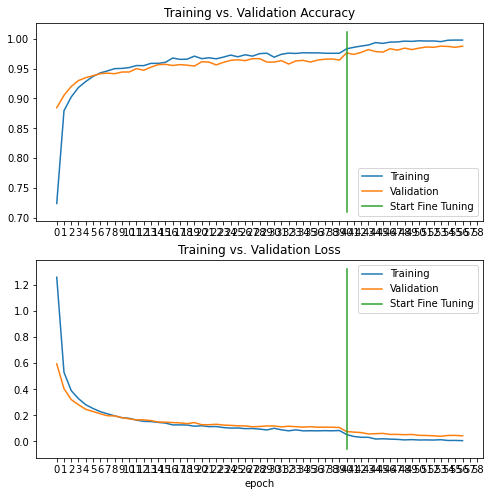

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training')
plt.plot(val_acc, label='Validation')
plt.xticks(range(total_epochs))
# plt.ylim([0.9, 1])
plt.plot([init_epochs,init_epochs],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training vs. Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training')
plt.plot(val_loss, label='Validation')
plt.xticks(range(total_epochs))
# plt.ylim([0, 0.5])
plt.plot([init_epochs,init_epochs],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training vs. Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
modelX.save('/content/gdrive/MyDrive/DATASET/Model_trained/model_xception_Land_use.h5')

#### Model evaluation

In [ ]:
# Evaluate on test set
modelX.evaluate(test_geneartor_xception)

33/33 [==============================] - 19s 562ms/step - loss: 0.0442 - accuracy: 0.9857


[0.044171467423439026, 0.9857142567634583]

In [ ]:
# Get class
val_generator_xception.class_indices

{'agricultural': 0,
 'airplane': 1,
 'baseballdiamond': 2,
 'beach': 3,
 'buildings': 4,
 'chaparral': 5,
 'denseresidential': 6,
 'forest': 7,
 'freeway': 8,
 'golfcourse': 9,
 'harbor': 10,
 'intersection': 11,
 'mediumresidential': 12,
 'mobilehomepark': 13,
 'overpass': 14,
 'parkinglot': 15,
 'river': 16,
 'runway': 17,
 'sparseresidential': 18,
 'storagetanks': 19,
 'tenniscourt': 20}

In [ ]:
# Predict validation set
predictions = modelX.predict(val_generator_xception)

In [ ]:
# Result predict is probability
predictions[0]

array([1.0000000e+00, 1.9860375e-16, 1.2507119e-15, 6.8044102e-17,
       7.7829708e-13, 4.3394945e-12, 3.3346493e-17, 6.3377011e-14,
       3.0679435e-12, 6.2364813e-14, 9.3869883e-19, 1.2516837e-18,
       3.7667613e-19, 8.3606567e-19, 4.3449292e-15, 2.6642124e-14,
       4.5332136e-18, 1.3994039e-11, 3.5086950e-17, 1.8812045e-15,
       2.9230917e-14], dtype=float32)

In [ ]:
# Get class been predicted of validation set
pred_indices = np.argmax(predictions, axis=1)
pred_indices

array([ 0,  0,  0, ..., 20, 20, 20])

In [ ]:
# REAL CLASS OF VALIDATION SET (NOT PREDICT)
val_ground_truth = val_generator_xception.classes
val_ground_truth

array([ 0,  0,  0, ..., 20, 20, 20], dtype=int32)

In [ ]:
# classification report
print(classification_report(
                            val_ground_truth,
                            pred_indices,
                            target_names = list(val_generator_xception.class_indices.keys())
                            ))

                   precision    recall  f1-score   support

     agricultural       1.00      1.00      1.00       100
         airplane       0.99      1.00      1.00       100
  baseballdiamond       0.98      1.00      0.99       100
            beach       1.00      0.98      0.99       100
        buildings       0.97      1.00      0.99       100
        chaparral       1.00      1.00      1.00       100
 denseresidential       0.96      0.94      0.95       100
           forest       1.00      1.00      1.00       100
          freeway       0.97      1.00      0.99       100
       golfcourse       0.99      0.99      0.99       100
           harbor       1.00      1.00      1.00       100
     intersection       0.99      0.98      0.98       100
mediumresidential       0.95      0.95      0.95       100
   mobilehomepark       0.99      0.98      0.98       100
         overpass       0.99      0.97      0.98       100
       parkinglot       1.00      1.00      1.00       

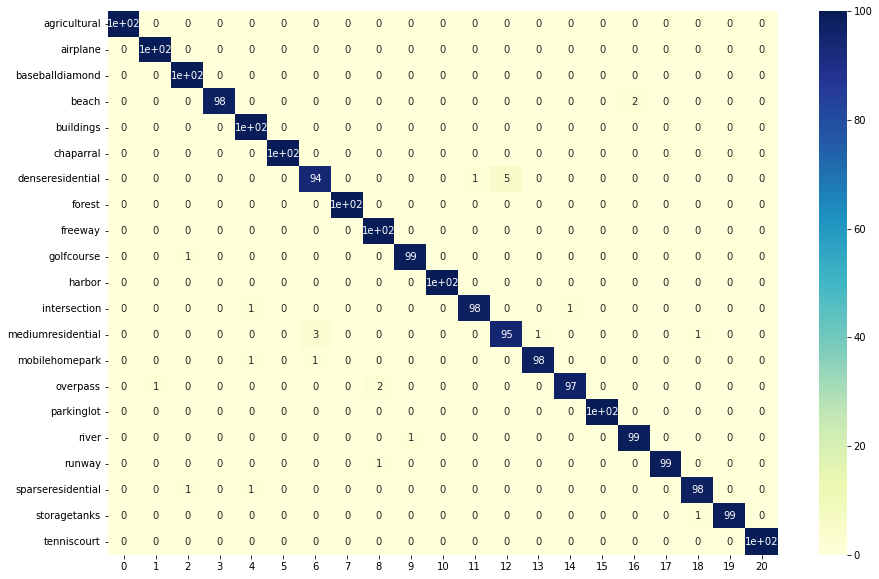

In [ ]:
matrix = confusion_matrix(val_ground_truth, pred_indices)
target_names = list(val_generator_xception.class_indices.keys())
plt.figure(figsize=(15,10))

sns.heatmap(matrix,
            annot = True,
            yticklabels = target_names,
            cmap = "YlGnBu")


#### Error Analysis

In [ ]:
print(val_generator_xception.class_indices)

{'agricultural': 0, 'airplane': 1, 'baseballdiamond': 2, 'beach': 3, 'buildings': 4, 'chaparral': 5, 'denseresidential': 6, 'forest': 7, 'freeway': 8, 'golfcourse': 9, 'harbor': 10, 'intersection': 11, 'mediumresidential': 12, 'mobilehomepark': 13, 'overpass': 14, 'parkinglot': 15, 'river': 16, 'runway': 17, 'sparseresidential': 18, 'storagetanks': 19, 'tenniscourt': 20}


In [ ]:
filenames = val_generator_xception.filenames
print(len(filenames))
print(filenames[500:505], '\n')

ground_truth = val_generator_xception.classes
print(len(ground_truth))
ground_truth

2100
['chaparral/chaparral_000008.png', 'chaparral/chaparral_000013.png', 'chaparral/chaparral_000016.png', 'chaparral/chaparral_000026.png', 'chaparral/chaparral_000029.png'] 

2100


array([ 0,  0,  0, ..., 20, 20, 20], dtype=int32)

In [ ]:
predictions = modelX.predict(val_generator_xception)

###### Code error analysis

In [ ]:
modelX = tf.keras.models.load_model('/content/gdrive/MyDrive/DATASET/Model_trained/model_xception_Land_use.h5')

In [ ]:
# prediction_table is a dict with index, prediction, ground truth
prediction_table = {}
for index, val in enumerate(predictions):
    # get argmax index
    index_of_highest_probability = np.argmax(val)
    value_of_highest_probability = val[index_of_highest_probability]
    prediction_table[index] = [value_of_highest_probability, 
                               index_of_highest_probability, 
                               ground_truth[index]]
assert len(predictions) == len(ground_truth) == len(prediction_table)

In [ ]:
def get_images_with_sorted_probabilities(prediction_table,
                                         get_highest_probability,
                                         label,
                                         number_of_items,
                                         only_false_predictions=False):
    sorted_prediction_table = [(k, prediction_table[k])
                               for k in sorted(prediction_table,
                                               key=prediction_table.get,
                                               reverse=get_highest_probability)
                               ]
    result = []
    for index, key in enumerate(sorted_prediction_table):
        image_index, [probability, predicted_index, gt] = key
        if predicted_index == label:
            if only_false_predictions == True:
                if predicted_index != gt:
                    result.append(
                        [image_index, [probability, predicted_index, gt]])
            else:
                result.append(
                    [image_index, [probability, predicted_index, gt]])
    return result[:number_of_items]

def plot_images(filenames, distances, message):
    images = []
    for filename in filenames:
        images.append(mpimg.imread(filename))
    plt.figure(figsize=(20, 15))
    columns = 5
    for i, image in enumerate(images):
        ax = plt.subplot(len(images) / columns + 1, columns, i + 1)
        ax.set_title("\n\n" + filenames[i].split("/")[-1] + "\n" +
                     "\nProbability: " +
                     str(float("{0:.2f}".format(distances[i]))))
        plt.suptitle(message, fontsize=20, fontweight='bold')
        plt.axis('off')
        plt.imshow(image)
        
def display(sorted_indices, message):
    similar_image_paths = []
    distances = []
    for name, value in sorted_indices:
        [probability, predicted_index, gt] = value
        similar_image_paths.append(str(val_dir) + '/' + filenames[name])
        distances.append(probability)
    plot_images(similar_image_paths, distances, message)

###### Let me display images, the Model with high confidence to predict

In [ ]:
def high_confidence_of_class(list_name_class):
  
  for i in range(len(list_name_class)):
    message = f'\n HIGH Confidence of {list_name_class[i]}'
    Highest_confident = get_images_with_sorted_probabilities(prediction_table, True, i, 10, False)
    display(Highest_confident, message)

###### Let me display images, the Model with low confidence to predict

In [ ]:
def low_confidence_of_class(list_name_class):
  
  for i in range(len(list_name_class)):
    message = f"\n Low Confidence of {list_name_class[i]}"
    Lowest_confident = get_images_with_sorted_probabilities(prediction_table, False, i, 10, False)
    display(Lowest_confident, message)

Look what images of these labels with the highest probability of containing another label

In [ ]:
target_names = list(val_generator_xception.class_indices.keys())

In [ ]:
def wrong_label(list_name_class):
  plt.figure(figsize=(15,10))
  for i in range(len(list_name_class)):
    message = f'\n incorrect {list_name_class[i]}'
    incorrect_images = get_images_with_sorted_probabilities(prediction_table, True, i, 10, True)
    display(incorrect_images, message)
  plt.show()

## **Predict real image**

In [ ]:
#OR CHOOSE A RANDOM PHOTO FROM PREDICTION FOLDER
TEST_SET = pathlib.Path('/content/gdrive/MyDrive/DATASET/img')

In [ ]:
def plot_predict(model, images_path): # Truyền vào link folder contain image
  # Random choice
  TEST_SET = pathlib.Path(images_path)
  img_path = random.choice(list(TEST_SET.glob('*')))
  
  # Convert image to arrray
  img        = image.load_img(img_path, target_size=(299, 299))
  img_array  = image.img_to_array(img)
  img_array  = np.expand_dims(img_array, axis=0)

  prediction = model.predict(img_array)

  for key, value in val_generator_xception.class_indices.items():
    if value == prediction[0].argmax():
      pred = key

  plt.figure(figsize=(10,10))
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.title('Prediction: ' + pred.upper())
  plt.axis('off')
  plt.grid(b=None)
  plt.show()

Every click, you can see a new image predicted by model Xception.

The whole image screenshotted on Google Map


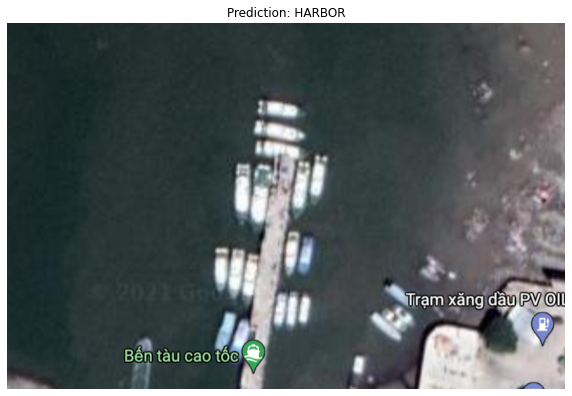

In [ ]:
plot_predict(modelX, TEST_SET)

Model Xception work good with image screenshot from google map.

Some case false predict because dataset not clear, shown in wrong label functions above